# Introdução

Neste projeto será utilizada a base de dados fornecida pelo Hospital Sírio Libanês. Ela esta disponível no site do [Kaggle](https://www.kaggle.com/) na pagina do grupo do Sírio Libanês [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19).

Essa base de dados contém informações, não sensíveis, que diz respeito a quantidade de pacientes que foram ou não internados por covid-19 na clínica do hospital durante a pandemia de corona virus. A pandemia de COVID-19 atingiu o mundo inteiro, sobrecarregando os sistemas de saúde - despreparados para uma solicitação tão intensa e demorada de leitos de UTI, profissionais, equipamentos de proteção individual e recursos de saúde. O Brasil registrou o primeiro caso COVID-19 em 26 de fevereiro e atingiu a transmissão na comunidade em 20 de março. 

## O problema 

Apesar do virus não ter uma letalidade tão alta a disseminação dele é. Ao infectar muitas pessoas, uma parcela delas precisará de assistência médica. Portanto, como a quantidade de pessoas que necessitam de assitência é extremamente alta ocorre o pressionamento do sistema de saúde.

Há urgência na obtenção de dados precisos para prever melhor as possiveis situações em que um paciente esta e antecipar o preparo os sistemas de saúde e hospitais de campanha, visando evitar colapsos no sistema de saúde. Tudo isso usando dados clínicos individuais - em vez de dados epidemiológicos e populacionais.

O colapso do sistema de saúde ocorre quando toda a estrutura não comporta a quantidade de atendimentos de qualquer natureza devido a alta demanda dos serviços de saúde. Nesta situação não basta só ter equipes médicas, de enfermagem e outros técnicos, pois a estrutura não comporta.

<img src='https://img.medscape.com/thumbnail_library/cdc_200313_flatten_the_curve_800x450.jpg'>


## Objetivos 

Ilutrado os problemas acima, podemos definir como objetivos as seguintes tarefas.

1. Prever a admissão na UTI de *casos confirmados* de COVID-19. Com base nos dados disponíveis, é viável prever quais pacientes precisarão de suporte em unidade de terapia intensiva?

O objetivo é fornecer aos hospitais terciários e trimestrais a resposta mais precisa, de modo que os recursos da UTI possam ser arranjados ou a transferência do paciente agendada.

2. Prever NÃO admissão à UTI de *casos COVID-19 confirmados*. Com base na subamostra de dados amplamente disponíveis, é viável prever quais pacientes precisarão de suporte de unidade de terapia intensiva?

O objetivo é fornecer aos hospitais locais e temporários uma resposta boa o suficiente, para que os médicos de linha de frente possam dar alta com segurança e acompanhar remotamente esses pacientes. 

## O Conceito de Janela 

Na pagina do Kaggle é ilustrado o conceito de janela. Em uma janela existe dados agrupados de um paciente, que consiste em: 

**Paciente**: 
 - Visita do Paciente
 - Agregada por janelas em ordem cronológica


|Janela|Descrição|
---|---
0-2|de 0 a 2 horas da admissão no hospital
2-4|de 2 a 4 horas da admissão no hospital
4-6|de 4 a 6 horas da admissão no hospital
6-12|de 6 a 12 horas da admissão no hospital
Acima-12|Acima de 12 horas da admissão no hospital

**OBS:** *Cuidado para NÃO usar os dados quando o paciente já estiver na UTI, pois a ordem do evento é desconhecida (talvez o evento "coleta de informação" tenha acontecido antes ou depois do paciente se encontrar na unidade). Eles foram mantidos para que no futuro possam aumentar este conjunto de dados em outros resultados posteriormente.*

**Ilustração de como funciona uma janela de informações**:
<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media'>

> Acima temos um paciente que deu entrada no sistema e só foi para a UTI na janela acima de 12h.

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media'>

> Acima temos um paciente que foi para a UTI na janela de 2h. 

Note que até o paciente ir para a UTI podemos utilizar os registros informados na base de dados, entrentanto se o paciente foi para UTI, as informações não podem ser usadas, pois não sabemos se ela foi feita antes do paciente ir para unidade ou depois. Então nesta situação as informações não tem poder preditivo.

## Os dados 

Este conjunto de dados contém dados anônimos do Hospital Sírio-Libanês, de São Paulo e de Brasília. Todos os dados foram tornados anônimos seguindo as melhores práticas e recomendações internacionais.

Os dados foram limpos e escalados por coluna de acordo com Min Max Scaler para caber entre -1 e 1. 

### A respeito da importância da anonimização dos dados

A Lei Geral de Proteção de Dados Pessoais (LGPD), Lei nº 13.709, de 14 de agosto de 2018, dispõe sobre o tratamento de dados pessoais, inclusive nos meios digitais, por pessoa natural ou por pessoa jurídica de direito público ou privado, com o objetivo de proteger os direitos fundamentais de liberdade e de privacidade e o livre desenvolvimento da personalidade da pessoa natural. 

Tendo em vista a vigência dessa Lei, de suma importancia pra sociedade, é importante que os dados sejam anonimizados para respeitar os direitos dos cidadãos brasileiros. É importante citar isso pois anonimização de um dado deve ser muito bem feita afim de não violar o direito dos individuos.

Note que só o fato de sabermos que a mostra foi retirada dentre os pacientes do Hospital Sírio Libanês em um intervalo X de tempo já reduz muito o fator de anonimidade do dado e se uma variável fosse explicitamente a comorbidade "diabetes", "pressão alta" ou "HIV", caso as variáveis não fossem *clusterizadas*, sabendo a prevalência de uma doença numa população é possível encontrar as características de cada amostra e é importante dificultar este tipo de análise para estar de acordo com a lei de proteção de dados.

Uma forma de anonimizar esses dados é criar grupos de características entre as amostras evitando assim de informar exatamente quais são as características de um elemento da base de dados. 

fonte: [Lei Geral de Proteção de Dados - LGPD](https://www.planalto.gov.br/ccivil_03/_Ato2015-2018/2018/Lei/L13709.htm#ementa)


### Dados Disponíveis

|Grupo de dados| quantidade de informações|
|---|---|
|Informação demográfica| 3 |
|Doenças pré-existentes| 9 |
|Resultados do exame de sangue| 36 |
|Sinais vitais | 6 |

No total, temos 54 variáveis, expandidas quando *pertinente* para a **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**

**Dicas**

* **Dados Faltantes:**

    **Problema:** um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia nas suas diferentes medidas. Por exemplo, sinais vitais são medidos com mais frequencia (normalmente de hora em hora) do que os exames de sangue (diários).

    **Sugestão:** é razoável presumir que um paciente que não tem uma medida registrada em uma janela de tempo está clinicamente estável, apresentando  sinais vitais e exames de sangue similares aos das janelas vizinhas. Portanto, se pode preencher os dados faltantes usando os dados da janela anterior ou posterior. Atenção para a multicolinearidade e casos de variância 0 nestes dados quando for escolher seu algoritmo.

* **Quanto antes, melhor!**

    **Problema:** A identificação precoce destes pacientes que vão desenvolver um caso adverso da doença (e precisarão de cuidado intensivo) é chave para um tratamento apropriado (salvando vidas) e para administrar os leitos e recursos.

    **Sugestão:** Enquanto um modelo preditivo que use todas as janelas de tempo vai provavelmente conseguir uma acurácia melhor, um bom modelo usando apenas a primeira janela (de 0 a 2 horas) é provavelmente mais clinicamente relevante. A criatividade é, no entanto, muito bem vinda, portanto sinta-se livre com a engenharia de variáveis e janelas de tempo. Atenção para medições repetidas nos indivíduos, uma vez  que estes valores estão altamente correlacionados quando explorarmos os dados.

**Reconhecimento**
A Sociedade Beneficiente de Senhoras Sírio-Libanês está comprometida com a ciência e a filantropia para que os casos tenham o melhor tratamento de saúde possível para aqueles que dele necessitam. Nós gostaríamos de agradecer especialmente nosso departamento jurídico, nosso Instituto de Pesquisa e Educação e o Squad de Arquitetura e Inteligência de dados Clínicos e Radiológicos.

## Critérios de avaliação do projeto 

Existem duas perspectivas que serão analisadas na aprovação do projeto exigidas pela Alura: 

* Técnico
* Prático


### Critério técnico

#### Escopo do Projeto

Delimitar qual será o escopo do seu projeto e colocá-lo, de fato, em prática pode ser bastante desafiador pois é um equilíbrio entre a criatividade/entusiasmo e o tempo.

Por isso, começar, desenvolver e finalizar todas as frentes abertas em um estudo é valioso.Você, cientista, precisa mais uma vez, ponderar: explorar pouco as possibilidades e ter um estudo raso ou explorar muitas possibilidades e não ser capaz de fechar dentro do elemento limitador, o tempo.

#### Estrutura do projeto

É necessário que seu estudo seja bem organizado e estruturado, apresentando uma sequência lógica da análise.

O projeto precisa expressar e justificar qual a linha de raciocínio foi criada e seguida durante o processo de elaboração.

#### Storytelling e conclusões

Parte da entrega de um estudo, é mostrar para a comunidade qual o seu valor, ou seja, contextualizar e trazer o interlocutor para o mesmo ponto de partida é vital.

É imprescindível que você pense que seu interlocutor, muitas vezes, não sabe do que aquele estudo se trata e/ou nem tem familiaridade com tecnologia e programação. Por isso, o notebook precisa ser explicativo de forma que a informação seja acessível para todos.

As conclusões parciais e a conclusão final são ótimos artifícios para que a informação você extraiu dos dados, seja mais facilmente entregue ao leitor (lembre-se: resultados podem ser inconclusivos, também).

Lembrete: este projeto será apresentado, de maneira fictícia, para o gerente responsável pela modelagem de dados do time de Data Science do Hospital Sírio Libanês. Você precisará persuadi-lo de que seu modelo tem os pontos necessários para entrar em produção e ajudará a antever e evitar qualquer ruptura.

#### Boas práticas de programação

Parte essencial de Data Science é a construção de código fundamentada nas boas práticas de programação.

Uma boa documentação do código, nomes significativos para as variáveis, a reutilização de funções, podem ser exemplos de como colocar esse conceito em prática.

Por isso, durante a correção, será dada uma atenção especial a esse cuidado que deve ser dado ao notebook.

#### Gráficos e Tabelas

A organização dos dados em gráficos e/ou tabelas é fundamental para a construção de uma boa visualização dos dados, ou seja, precisamos entender como eles estão distribuídos e se comportam ao longo do tempo.

Por isso, gráficos ou tabelas completos e viáveis são indispensáveis (ex: título explicativo, labels nomeadas. No caso específico de gráficos: escala ajustada, início em (0, 0) ou caso não aconteça, apresente justificativa, por exemplo).

#### Pesquisas externas e cruzamento de dados

Do ponto de vista do estudo, é muito enriquecedor que outras fontes de informações sejam usadas para agregar valor e corroborar na construção da argumentação do projeto. E do ponto de vista técnico, isso mostra adaptabilidade e pensamento sempre um passo à frente, isso porque o cruzamento de dados é um passo muito importante no seu amadurecimento enquanto Data Scientist.

Porém, é preciso tomar bastante cuidado ao fazer essa junção: será avaliado o valor agregado à pesquisa, não somente o cruzamento em si.

*Dica: os dados do DataSUS podem ser uma boa fonte de inspiração para os cruzamentos. Além disso, você pode expandir suas análises feitas durante os projetos do módulo 01 e módulo 04, visto que, a partir das nossas conclusões, conseguimos justificar a implantação de um modelo que visa monitorar a evolução do quadro pandêmico no Brasil que apresenta alta nos casos.*

### Critério prático

* Os critérios mínimos práticos são bastante objetivos e claros, cientista. Use como um lembrete sobre o conteúdo que deve produzir.

* Os dados estão dentro do escopo? (É obrigatório o uso da base de dados da Covid-19, disponibilizada pelo Hospital Sírio Libanês - São Paulo e Brasília, no Kaggle)

* Ao rodar o notebook, ele apresenta erros? (Warnings serão desconsiderados)

* Quando necessário, as variáveis foram tratadas?

* Se houve criação de variáveis, as mesmas foram descritas?

* Ficou claro qual foi o modelo final escolhido e o que motivou a escolha?

* Quais testes foram aplicados? Foi justificado?

* O modelo foi testado e validado adequadamente?

* O notebook tem uma narrativa convincente e coerente?

* O projeto contém meios para visualizar dados (gráficos ou tabelas) que ajudam na argumentação dos pontos principais do cientista?

* A bibliografia e fontes de dados alternativas foram citadas?

---



---
# Importações e definições

Aqui estão todos módulos python que vou utilizar neste trabalho, bem como as funções criadas para exibições. 

## Importações

In [1]:
# Módulos que é sempre bom ter à mão
import numpy as np  # Versão: 1.19.2
import pandas as pd  #  Versão: 1.2.2
import seaborn as sns  #  Versão: 0.11.1
from matplotlib import pyplot as plt  #  Versão: 3.3.4

# statsmodels  Versão: 0.12.2
from statsmodels import api as sm 
from statsmodels import stats as ss
from statsmodels.stats.weightstats import zconfint, ztest


# Sci-kit Learn  Versão: 0.24.1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score

### Base de dados

In [2]:
sirio_libanes = pd.read_excel('https://github.com/ConradBitt/BootCamp_DataScience/blob/master/ML%20em%20Saude/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')

## Definições 

Esta etapa pode não seguir a ordem cronológica do relatório, pos aqui ficam os códigos para evitar que tenha várias funções complexas ao longo da análise. Contruindo funções aqui facilita analisar apenas os outputs de cada função.

In [3]:
#np.random.randint(0,2**32) # semente gerada: 3340758118
seed = 3340758118

# ===================================== Análise exploratória ======================
# Estatisticas descritivas dos dados 

## Muda identificador 
def muda_identificador(dados):
    """
    Muda o index para o identificador PATIENT_VISIT_IDENTIFIER
    """
    dados_novo_id = dados.set_index('PATIENT_VISIT_IDENTIFIER')
    return dados_novo_id
        
# Describe do statsmodels 
def descricoes_pandas_statsmodels(dados):
    """
    Retorna uma tupla com estatisticas descritivas
    usando o pandas e o statsmodels.
    """
    descricoes_stats_models = ss.descriptivestats.Description(dados)
    descricoes_pandas = dados.describe()
    return descricoes_pandas, descricoes_stats_models


def exibe_frequencia_variaveis_categoricas(dados):
    for coluna in dados.columns:
        if sirio_libanes[coluna].dtype != float:
            display(sirio_libanes[coluna].value_counts().to_frame().T)
        elif coluna == "WINDOW":
            display(sirio_libanes[coluna].value_counts().to_frame().T)
        elif coluna == "AGE_PERCENTIL":
            display(sirio_libanes[coluna].value_counts().to_frame().T)
    return None


def exibe_mapa_correlaçao(dados, title='', metodo = 'pearson', cmap='cool', figsize=(20,12), annot=False):
    """
    Exibe um mapa de correlação.
    """
    corr = dados.corr(method=metodo)
    plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, cmap=cmap, annot=annot, fmt='.2f')
    ax.set_title(title, fontsize=20, pad=20)
    return ax

# ===================================== Pré processamento ======================

def categorico_para_quantitativo(dados, variavel_categorica):
    """
    Muda os dados quantiativos para categoricos. 
    """
    le = LabelEncoder()
    le.fit(dados[variavel_categorica])
    dados[variavel_categorica] = le.fit_transform(dados[variavel_categorica]) / 10
    return dados

def normaliza_window_pela_freq_prim_janeila(dados, variavel):
    """
    Esta função categoriza a variável WINDOW pela frequencia 
    da primeira janela. Basicamente extrai a frequência dos 
    elementos que compõem a variável e divide cada uma delas
    pela frequencia do primeiro elemento. Em seguida faz um 
    replace na variável original. 
    """
    mapa = dados[variavel].value_counts(normalize=True) / (dados[variavel].value_counts(normalize=True)[0])
    dados[variavel] = dados[variavel].replace(mapa)
    dados = dados.dropna()
    return dados


def interpolacao(grupo):
    return grupo.interpolate(method='linear', limit=1, limit_direction='both')


def preenche_nan(dados):
    """
    Esta função preenche os dados do tipo NaN.
    Primeiro ela agrupa os dados pelo identificador,
    Aplica uma interpolação linear entre os visinhos
    Aplica um preenchimento com o registro anterior
    Aplica um preenchimento com o registro posteior
    retorna o dataframe com os dados preenchidos.
    """
    
    # separação de features em categoricas continuas e os classificadores.
    features_categoricas = dados.iloc[:,:13]
    colunas_features_continuas = dados.iloc[:,13:-2].columns
    classificadores = dados.iloc[:,-2:]
    
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER')[colunas_features_continuas].apply(
        interpolacao
    ).fillna(method='backfill').fillna(method='ffill')
    
    dado_preenchido = pd.concat([features_categoricas, features_continuas, classificadores],
                                axis=1, ignore_index=False)
    dado_preenchido.columns = dados.columns
    dado_preenchido = dado_preenchido.fillna(value=0)
    return dado_preenchido


def foi_para_UTI(dado_agrupado : pd.DataFrame):
    """
    Esta função verifica quais pacientes foram pra UTI na janela.
    Se o paciente foi pra UTI na janela 2, então adiciona o valor 1
    na coluna ICU anterior e retorna todo o grupo até ela.
    """
    
    if np.any(dado_agrupado['ICU']):  # se o paciente foi em algum momento pra uti    
        
        # momento em que foi para UTI
        momento_foi_para_uti = len(dado_agrupado['ICU']) - dado_agrupado['ICU'].sum()
        
        # adicionando 1 na janela anterior a que o paciente foi para UTI
        for linha in range(len(dado_agrupado)):
            if dado_agrupado.loc[:,'ICU'].iloc[linha] == 1:
                dado_agrupado.loc[:,'ICU'].iloc[linha - 1] = 1  # adicionar 1 na coluna ICU anterior
        
        if momento_foi_para_uti != 0:  #  se não foi na primeira janela
            # retorna o grupo até a janela em que ele foi para UTI
            return dado_agrupado.iloc[:momento_foi_para_uti, :]
        
        elif momento_foi_para_uti == 0:  # se tem todas as linhas preenchidas
            return dado_agrupado.iloc[momento_foi_para_uti, :]
        #else:
            # retorna o paciente que foi pra UTI na primeira janela
            # talvez esta linha abaixo possa ser desconsiderada
        #    return dado_agrupado.iloc[momento_foi_para_uti, :].to_frame().T   
    else:
        # retorna o paciente que não foi em nenhum momento para a UTI
        return dado_agrupado
    
def filtro_janelas_uteis(dado):
    """
    Filtra os registros pelas janelas úteis dos pacientes
    que foram para a UTI e também daqueles que não foram.
    """
    dado_filtrado = dado.groupby('PATIENT_VISIT_IDENTIFIER').apply(foi_para_UTI)
    dado_filtrado = dado_filtrado.reset_index().set_index('PATIENT_VISIT_IDENTIFIER')
    dado_filtrado = dado_filtrado[dado.columns]
    return dado_filtrado


def remove_variaveis_altamente_correlacionadas(dados, metodo_correlacao, valor_corte):
    matriz_corr = dados.corr(method=metodo_correlacao).abs()
    matriz_triangular_superior_booleana = np.triu(np.ones(matriz_corr.shape), k=1).astype('bool')
    matriz_trig_sup_corr = matriz_corr.where(matriz_triangular_superior_booleana)
    excluir_elemento = [coluna for coluna in matriz_trig_sup_corr.columns if any(
        matriz_trig_sup_corr[coluna] > valor_corte
    )]
    
    return dados.drop(excluir_elemento, axis='columns')

# ===================================== Estimadores  ======================

## ================== Randomized Search CV ================================

def cria_cv_SKF(random_state=seed):
    """
    Cria um objeto de validação cruzada do tipo Stratified K Fold.
    """
    tecnica_cv_SKF = StratifiedKFold(shuffle=True,random_state=random_state)
    return tecnica_cv_SKF


def cria_estimadores_RSCV(estimator,param_distributions, cv, random_state=seed):
    """
    Cria um Randomized Search CV com o estimador, parmâmetros e a técnica de 
    validação cruzada. Retorna um conjunto de estimadores selecionados aleatóriamente
    pronto para a o ajuste '.fit(x,y)'
    """
    estimadores_rscv = RandomizedSearchCV(estimator = estimator,param_distributions = param_distributions,
                                          n_iter = 50, scoring='roc_auc',return_train_score = True, 
                                          cv=cv,random_state=random_state)
    return estimadores_rscv


def formata_estatisticas_descritivas(resultados_cv, estimator):
    """
    Essa função formata o método .describe() de um dataframe
    contruido com os resultados da validação cruzada. Apenas
    inclui o intervalo de confiaça baseado numa distribuição
    normal com o teste Z.
    """
    nome_estimador = str(estimator).split('(')[0]
    
    estatisticas = resultados_cv.describe()[['mean_test_score','mean_train_score']].T
    
    conf_int_test = np.array(zconfint(resultados_cv['mean_test_score'])).round(3)
    conf_int_treino = np.array(zconfint(resultados_cv['mean_train_score'])).round(3)
    
    estatisticas['Z_conf_int'] = [conf_int_test, conf_int_treino]
    estatisticas = estatisticas.rename_axis(index=nome_estimador, columns='Estatisticas')
    return estatisticas
    


def executa_RSCV_com_cv_SKF(estimador, x, y, parametros_estimador, random_state = seed,
                           exibe_resultados_brutos = True, exibe_estatisticas_descritivas = True):
    """
    Executa um modelo randomizado de hiperparâmetros
    com a validação cruzada do tipo SKF e retorna o
    melhor estimador e os resultados brutos de cada CV.
    """
    
    tecnica_cv_SKF = cria_cv_SKF(random_state=seed)    
    informacoes_RSCV = [
        'rank_test_score','mean_fit_time','mean_test_score',
        'std_test_score','mean_train_score','std_train_score'
    ]
    
    estimadores_rscv = cria_estimadores_RSCV(estimador,parametros_estimador,tecnica_cv_SKF, seed)
    estimadores_buscados = estimadores_rscv.fit(x, y)
    
    melhor_estimador = estimadores_buscados.best_estimator_
    
    resultados_busca = pd.DataFrame(estimadores_buscados.cv_results_)[informacoes_RSCV]
    resultados_busca = resultados_busca.sort_values(by='rank_test_score').set_index('rank_test_score')
    
    if exibe_resultados_brutos:
        display(resultados_busca)
    
    if exibe_estatisticas_descritivas:
        estatisticas_descritivas = formata_estatisticas_descritivas(resultados_busca, estimador)
        display(estatisticas_descritivas.round(3))
        pass
    
    melhor_estimador_parametros = 'Melhor estimador: '+'\033[34m'+f'{melhor_estimador}' + '\033[0;0m'
    print(melhor_estimador_parametros)
    return melhor_estimador, resultados_busca

# ==================================== Resultados =========================

def plot_roc_estimador(estimador, x_test,y_test, x_val, y_val, ax):
    """
    Recebe um estimador, os dados de teste e validação 
    para exibir um gráfico da curva ROC.
    Retorna o axis
    """
    nome_estimador = str(estimador).split('(')[0]

    plot_roc_curve(estimador, x_test, y_test, ax = ax)
    plot_roc_curve(estimador, x_val, y_val, ax = ax )
    plot_roc_curve(dummy_classifier, x_validacao, y_validacao, ax = ax , linestyle='dashed',color='red');
    
    ax.set_title(f'{nome_estimador}', fontsize=20)

def comparacoes_roc(estimadores):
    """
    Exibe a curva roc de quatro estimadores passados em uma lista
    """
    
    f, ax = plt.subplots(2, 2,figsize=(18,15))

    plot_roc_estimador(estimadores[0], x_teste, y_teste, x_validacao, y_validacao, ax=ax[0,0]);
    plot_roc_estimador(estimadores[1], x_teste, y_teste, x_validacao, y_validacao, ax=ax[0,1]);
    plot_roc_estimador(estimadores[2], x_teste, y_teste, x_validacao, y_validacao, ax=ax[1,0]);
    plot_roc_estimador(estimadores[3], x_teste, y_teste, x_validacao, y_validacao, ax=ax[1,1]);


```python
dummy_classifier = DummyClassifier()
decision_tree_classifier = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
sgd_classifier = SGDClassifier()
linear_svc = LinearSVC()
```

---
# Análise exploratória 


## Visualizando uma amostra

In [4]:
sirio_libanes.sample(10, random_state=seed)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1908,381,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,6-12,0
1548,309,0,40th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
404,80,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.523810,-0.898990,-0.44757,-0.110067,-0.476752,-0.677419,-0.526426,-0.902167,ABOVE_12,0
1891,378,0,10th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1663,332,1,80th,0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,0
402,80,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
955,191,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,NaN,-1.000000,-1.000000,0-2,0
592,118,0,20th,1,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1149,229,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.214286,-0.838384,-0.36087,-0.485092,-0.342203,-0.695341,-0.229191,-0.840206,ABOVE_12,0
950,190,1,60th,1,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0


## Visualização de variáveis:

In [5]:
sirio_libanes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    PATIENT_VISIT_IDENTIFIER          int64  
 1    AGE_ABOVE65                       int64  
 2    AGE_PERCENTIL                     object 
 3    GENDER                            int64  
 4    DISEASE GROUPING 1                float64
 5    DISEASE GROUPING 2                float64
 6    DISEASE GROUPING 3                float64
 7    DISEASE GROUPING 4                float64
 8    DISEASE GROUPING 5                float64
 9    DISEASE GROUPING 6                float64
 10   HTN                               float64
 11   IMMUNOCOMPROMISED                 float64
 12   OTHER                             float64
 13   ALBUMIN_MEDIAN                    float64
 14   ALBUMIN_MEAN                      float64
 15   ALBUMIN_MIN                       float64
 16   ALBUMIN_MAX           

### Comentário sobre análise das variáveis disponíveis 

> Verifica-se que tem um total de 1925 linhas com 231 variáveis. Entretanto como a variável `PATIENT_VISIT_IDENTIFIER` é uma variável identificadora, na realidade temos um total de 385 registros. de cada paciente com 230 variáveis.

In [6]:
sirio_libanes = muda_identificador(sirio_libanes)

> Dentre as variáveis, 255 são do tipo `float64`, 4 variáveis do tipo `int64` e 2 do tipo `object` que são do tipo string. 

> Outra informação que é relevante é a quantidade de variáveis do tipo **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**. Na pagina do Kaggle dizem que estas informações são pertinentes e por isso foram extraidas estas estatisticas. O fato dessas variáveis terem dependência pode gerar uma correlação alta entre cada uma delas.

## Proporção das variáveis categóricas

Através do método `info()` verificamos que existem 4 variáveis do tipo `object`, vamos analisar os valores possíveis de cada uma delas verificando a frequência com que cada uma aparece:

In [7]:
exibe_frequencia_variaveis_categoricas(sirio_libanes)

,0,1
AGE_ABOVE65,1025,900


,20th,30th,10th,40th,70th,80th,50th,60th,Above 90th,90th
AGE_PERCENTIL,215,205,205,200,195,190,190,185,185,155


,0,1
GENDER,1215,710


,ABOVE_12,6-12,2-4,0-2,4-6
WINDOW,385,385,385,385,385


,0,1
ICU,1410,515


> Na primeira tabela temos a variável `AGE_ABOVES`, é uma variável binária que indica se a pessoa tem mais de 65 anos. Pode-se verificar que existem mais registros classificados como abaixo de 65 anos do que acima.


> A tabela seguinte indica a variável `AGE_PERCENTIL`. Ela representa os percentis das idades que o paciente pertence. Por exemplo: 

* `AGE_PERCENTIL = 10th` idade de 0 até 10.

* `AGE_PERCENTIL = 20th` idade de 10 até 20.

*  `AGE_PERCENTIL = 30th` idade de 20 ...

* $....$

* `AGE_PERCENTIL = ABOVE 90th` idade de 90 até 100

> Por mais que seja uma variável categórica, ela é ordenável. Seŕa feita uma modificação nesta variável na parte de pré processamento.

> A terceira tabela exibe a variável `GENDER` ou seja, o gênero. Não tem como saber qual gênero de cada classificador, mas podemos afimar que existem mais registros com `GENDER` classificados como 0 do que como 1.


> Em seguida, na quarta tabela, temos a variável `WINDOW` que indentifica em qual janela o paciente esta. A explicação do conceito de janela foi explicada na introdução do problema e esta variável também será modificada na etapa de pré processamento. Repare que a frequencia de cada janela é a mesma para qualquer uma delas, isso pode levar a crer que estar na janela `0-2` ou na `4-6` é igualmente provável, entretanto veremos isso a diante.


> Por fim temos a variável `ICU` que classifica se o paciente foi ou não encaminhado para a unidade de terapia intensiva. 

--- 

## Estatisticas Descritivas: Statsmodels


In [8]:
descricoes_pandas, descricoes_stats_models = descricoes_pandas_statsmodels(sirio_libanes)

Vou utlizar as estatisticas descritivas do [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.Description.html#statsmodels.stats.descriptivestats.Description), apesar de que eu não vou comentar sobre todas elas acho relevante exibi-las tendo em vista que alguém pode se interessar por alguma estatsitica descritiva em específico. 

In [9]:
descricoes_stats_models.numeric.round(13)/5

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
nobs,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
missing,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,149.600000,138.800000,137.200000,137.000000,137.000000,137.000000,149.600000,138.800000,137.200000,0.000000
mean,0.093506,0.073766,0.021667,0.005625,0.019583,0.003958,0.025625,0.009375,0.042604,0.031667,...,-0.140737,-0.154068,-0.177439,-0.157399,-0.143190,-0.163560,-0.143829,-0.154265,-0.177396,0.053506
std_err,0.000052,0.000050,0.000032,0.000017,0.000031,0.000015,0.000035,0.000022,0.000043,0.000038,...,0.000082,0.000052,0.000048,0.000052,0.000068,0.000044,0.000076,0.000052,0.000048,0.000046
upper_ci,0.093608,0.073865,0.021730,0.005659,0.019644,0.003987,0.025693,0.009418,0.042688,0.031741,...,-0.140576,-0.153966,-0.177346,-0.157297,-0.143058,-0.163475,-0.143681,-0.154164,-0.177302,0.053597
lower_ci,0.093405,0.073668,0.021603,0.005591,0.019523,0.003930,0.025557,0.009332,0.042521,0.031592,...,-0.140897,-0.154169,-0.177533,-0.157502,-0.143323,-0.163645,-0.143978,-0.154367,-0.177490,0.053416
std,0.099815,0.096523,0.062176,0.033075,0.059456,0.027864,0.066863,0.042285,0.081910,0.073030,...,0.096419,0.063800,0.059229,0.064951,0.083821,0.054043,0.089320,0.063539,0.059354,0.088557
iqr,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070588,0.080952,0.024242,0.070904,0.095565,0.067494,0.073118,0.081065,0.023969,0.200000
iqr_normal,0.148260,0.148260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052327,0.060010,0.017971,0.052561,0.070842,0.050033,0.054203,0.060093,0.017768,0.148260
mad,0.099578,0.093118,0.038639,0.010934,0.035332,0.007760,0.044684,0.017871,0.067057,0.053306,...,0.071612,0.052243,0.027738,0.049445,0.065858,0.043024,0.067349,0.052054,0.027834,0.078384


### Comentário sobre estatisticas descritivas

> Os dados foram agrupados pelos identificadores e cada identificador tem 5 registros, logo ao utilizar a função que gera as estatisticas, se os 1920 registros forem utilizados estaremos contabilizando 5 resultados do mesmo indivíduo, por isso estou divindo o resultado por 5, ou seja, essas estatisticas são um panorama dos grupos, mas não representam fielmente a característica independente de cada um. Além disso os dados foram arredondados na 13º casa decimal.

> Como foi dito, algumas colunas não são numéricas, lógo não faz sentido extrair estatisticas descritivas delas por isso das 231 variaveis que tem a base de dados, apenas 228 foram utilizdas para a exibição.

> Podemos verificar que pra cada paciente tem em média um dado faltante na linha `missing`

> Um ponto interessante são as variáveis `DISEASE_GROUPING`, elas representam grupos de doenças, não sabemos exatamente quais são mas podemos verificar que dentre as 1920 informações a distribuição das médias de cada doença é diferente. Isso pode levar a seguinte hipótese "*Podemos supor que das 385 informações 2% tem  `DISEASE_GROUPING_1`*", **lembrando que as informações dos pacientes que foram para a UTI não tem relevancia preditiva devido ao anacronismo da coleta**, entretanto podemos utiliza-las para exibir informações de estatisticas descritivas.

### Descrição do pandas

Caso esteja habituado com as estatisticas descritivas do módulo do pandas, vou deixar o output aqui para consulta:

In [10]:
descricoes_pandas.round(13)/5

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,385.000000,385.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,235.400000,246.200000,247.800000,248.000000,248.000000,248.000000,235.400000,246.200000,247.800000,385.000000
mean,0.093506,0.073766,0.021667,0.005625,0.019583,0.003958,0.025625,0.009375,0.042604,0.031667,...,-0.140737,-0.154068,-0.177439,-0.157399,-0.143190,-0.163560,-0.143829,-0.154265,-0.177396,0.053506
std,0.099815,0.096523,0.062176,0.033075,0.059456,0.027864,0.066863,0.042285,0.081910,0.073030,...,0.096419,0.063800,0.059229,0.064951,0.083821,0.054043,0.089320,0.063539,0.059354,0.088557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.195238,-0.195960,-0.200000,-0.196989,-0.197964,-0.200000,-0.195185,-0.196067,0.000000
75%,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.129412,-0.119048,-0.175758,-0.129096,-0.104435,-0.132506,-0.126882,-0.118935,-0.176031,0.200000
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


## Correlação entre as variáveis 

Vimos que muitas variáveis estão expressas em termo das medidas: **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**. Tendo esta informação dada na introdução do problema vamos visualizar o mapa de correlação entre todas as variáveis usando a técnica de `Kendall`:

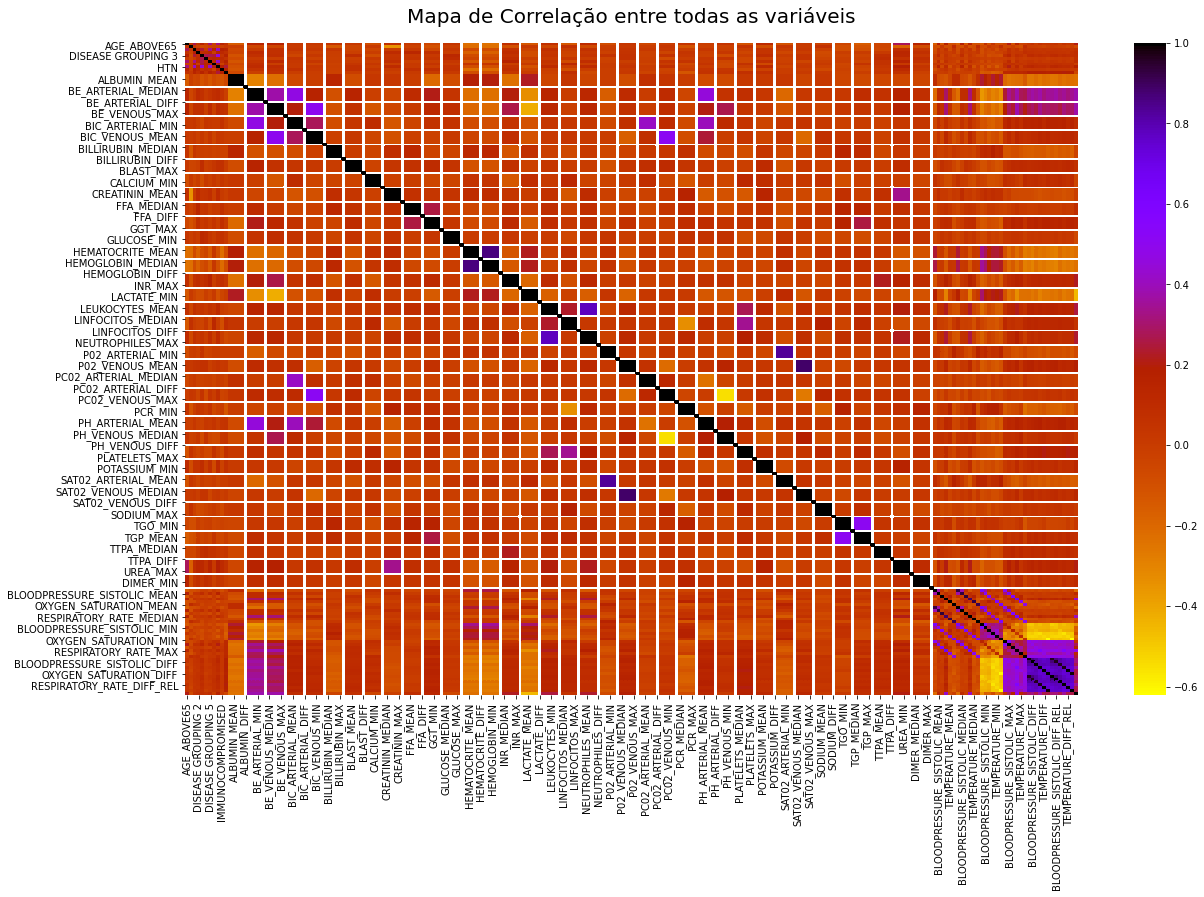

In [11]:
exibe_mapa_correlaçao(sirio_libanes,metodo='kendall',title='Mapa de Correlação entre todas as variáveis',cmap='gnuplot_r' , annot=False);

### Comentário sobre o mapa de correlação

> Note que o mapa é literalmente uma matriz quadrada. Na diagonal principal temos correlação da variável com ela mesma, por isso a coloração preta o que indica um coeficiente de correlação igual à 1.0.

> No canto inferior direito temos um grupo roxo, ou seja essas variáveis entre si tem uma correlação forte, entre 0.8. Esta variável `BLOODPRESSURE` com sufixos `DIFF` e `RELL`, na introdução foi tida como ocorre a dependência dessas variáveis e isso é um fato que faz a correlação ser alta. Por outro lado se tratando de dados biológicos devemos ter cuidado, pois o valor `MIN` de uma variável pode ser importante para a equipe tirar alguma conclusão e a amplitude (`DIFF = (MAX - MIN)`) também, mas o fato dessas variáveis terem uma correlação alta não implica necessariamente que trazem informações redundantes.

> O que pode ser feito para contornar este fato de features autamente correlacionadas é filtrar a correlação entre cada uma delas a partir de um valor de corte. Eu não vou realizar isso, a minha justificativa é porque esses dados se tratam de informações fisiológicas e essas foram colocadas ali com por ser importantes para alguma conclusão clínica.

# Pre processamento

Nesta etapa vou modificar algumas variáveis afim de facilitar análises futuras. 

## Tratando `AGE_PERCENTIL`

Como já foi dito anteriormente a variável `AGE_PERCENTIL` é uma variável do tipo `object`, entretanto se analisar os valores unicos dela é possível notar que são dados do tipo categóricos porem ordinais:

In [12]:
sirio_libanes.AGE_PERCENTIL.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

Tendo então as categorias vou utilizar uma função da biblioteca [Sci-Kit Learn] para fazer a transformação na variável, de um dado categórico para um dado quantitativo:

In [13]:
sirio_libanes = categorico_para_quantitativo(sirio_libanes, 'AGE_PERCENTIL')
sirio_libanes.AGE_PERCENTIL.unique()

array([0.5, 0.8, 0. , 0.3, 0.6, 0.1, 0.4, 0.7, 0.2, 0.9])

Desta forma a transformação que foi feita é:

| ANTES| DEPOIS|
|---|---|
|10th | 0 |
|20th | 0.1 |
|30th | 0.2 |
|40th | 0.3 |
|50th | 0.4 |
|60th | 0.5 |
|70th | 0.6 |
|80th | 0.7 |
|90th | 0.8 |
|Above 90th | 0.9 |

### Comentário sobre transformação do `AGE_PERCENTIL`

> A escolha deste tipo de transformação é deixar os dados dentro do padrão das variáveis da base de dados. A maioria delas esta normalizada, ou seja, dentro do intervalo $[-1,1]$. Poderia deixa-la no intervalo $[0,9]$ como sugere o própio `LabelEncoder` do sci-kit learn, mas não segui este caminho por pura liberdade.

## Tratando registros com `NaN`

Na etapa de estatisticas descritivas verificamos que em média, cada registro tem pelo menos 1 dado do tipo `missing`, digo isto baseado na descrição do statsmodels.

Para tratar os dados faltantes vou seguir a sugestão encontrada no site do Kaggle, que é preencher com o dado anterior ou com o anterior. Este preenchimento considera que num curto espaço de tempo a variação dos dados não é tão abrupta.

O processo de preenchimento sera o seguinte: 

1. Agrupar registros pelo index `PATIENT_VISIT_IDENTIFIER`.
2. Realizar uma interpolação linear caso falte um entre dois dados.
3. Preencher com o valor anterior.
4. Preencher com o valor posterior.
5. Petornar a base de dados com os dados preenchidos.

Ao agrupar os dados pelo index eu tenho garantia que cada alteração será feita em cada grupo, evitando que o paciente indice 5 seja afetado pelo numero 4 ou 6.

In [14]:
sirio_libanes = preenche_nan(sirio_libanes)

## Selecionando registros que podem ser usados para o modelo

Como já foi dito na introdução do problema, podemos utilizar os dados dos registros cujo *o paciente ainda não foi para UTI*. Esta condição é imposta ao descrever o conceito de janela. 

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media' width=60%>

> Note na ilustração acima que não podemos usar a janela das 12h tendo em vista que o paciente foi para UTI neste momento. 

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media' width=60%>

> Outro ponto citado é que não podemos usar as janelas posteriores ao evento de ir para a UTI.

A filtragem das janelas úteis que eu vou fazer consiste em **eliminar a janela cujo o paciente foi para a UTI**, além disso, acidionar $1$ na coluna `ICU` da janela anterior. Veja o exemplo na imagem abaixo:

<img src='https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/projeto_final/preprocessamento_filtro_janela.png'>

> O paciente foi para a UTI na janela `ABOVE_12`, logo esta janela não pode ser utilizada, isso esta indicado no quadradinho vermelho. Portanto o que será feito é adicionar $1$ na coluna `ICU` da janela anterior (`6-12`) e utilizar todas essas janelas disponíveis como esta indicado no quadradinho verde.

> **OBS 1**: *Verifique abaixo do quadradinho vermelho, a janela `0-2` o `ICU` desta linha é 1, ou seja, este paciente foi para a UTI na primeira janela e segundo a condição informada no Kaggle esta janela não pode ser utilizada e nem as posteriores. O que o filtro faz nesta situação é remover este paciente da base de dados.*

In [15]:
sirio_libanes = filtro_janelas_uteis(sirio_libanes)

> **OBS 2**: Tendo em vista que o filtro remove todos os pacientes que foram para UTI na primeira janela isso vai remover a normalização da base de dados. Antes do filtro, existia a mesma quantidade de pessoas 

## Tratando `WINDOW`

Assim como foi transformada a variável categórica `AGE_PERCENTIL` em uma variável quantitativa, vou transformar a variável `WINDOW` em uma variável quantativa de acordo com a normaliação da primeira janela. Em outras palavras, eu vou calcular a frequência de cada janela em relação a base de dados e vou dividir cada frequencia pela frequencia da janela nº1.

|`WINDOW` | Frequeência da janela |Frequência Normalizada da Janela| Normalização pela 1º Janela |
|---|---|---|---|
|0-2 |353 |0.250 | 1.00 |
|2-4 |326 |0.231 | 0.924 |
|4-6 |286 |0.203 | 0.810 |
|6-12|255 |0.181 | 0.722 |
|ABOVE_12| 190 |0.135 |0.538 |

A justificativa em fazer isso é porque estou assumindo que estar numa janela qualquer não é mais uma variável aleatória. Ao realizar o `filtro_janelas_uteis` a variável deixou de ser aleatória pois a frequencia . A maior parte dos pacientes vai passar no minimo uma vêz pela primeira janela e como queremos classificar o quanto antes a situação do paciente, dar peso maior para as primeiras janelas é razoável e a forma que eu encontrei de fazer isso é normalizando em função da primeira janela.

> Lembrando que essa transformação só pode ser feita após filtrar as janelas úteis, caso contrário, como a base de dados é normalizada, ao normalizar pela frequencia o resultado de todas as janelas seria igualmente provável.

Além disso, a ideia de que essa variável transformada seja decrescente pode ajudar a criar uma dependência inversa com a variável `ICU`, pois quanto menor o valor da variável `WINDOW` mais tempo a pessoa passou no hospital e se isso acontece é de se esperar que a pessoa esta lá porque realmente precisa do atendimento.


Uma outra possível abordagem é tentar utilizar uma distribuição de probabilidades geométrica para modelar esta transformação. O problema que eu tive nesta abordagem é a perda de memória da distribuição geométrica, isto é, a janela futura não depende da anterior e pro nosso problema em específico estar em uma ou outra janela não é um evento independente. Para mais informações sobre a distribuição de probabilidades geométrica consulte as notas de aula do curso [Introduction to Probability at anadvanced level](https://www.stat.berkeley.edu/~aditya/resources/AllLectures2018Fall201A.pdf) do professor Aditya Guntuboyina.

In [16]:
sirio_libanes = normaliza_window_pela_freq_prim_janeila(sirio_libanes,'WINDOW')

# Seleção de Modelos 

## O modelos escolhidos 

Para atingir o objetivo de estimar a necessidade ou não de um paciente precisar do serviço prestado pela unidade de terapia intensiva do hospital, precisamos não só de um modelo, mas de vários, a fim de comparar a qualidade de cada um deles. 

### Dummy Classifier 

A escolha de um modelo do tipo dummy se da por conta da necessidade de um *baseline*, isto é, se eu sortear uma pessoa aleatória em uma população e pedir pra ela classificar se um grupo de pessoas vai pra UTI ou não, a chance dessa pessoa classificar corretamente não será a melhor possível tendo em vista que ela foi sorteada aleatóriamente.

O exemplo do que consiste um dummy comparado a uma pessoa aleatória, só funciona se essa pessoa sorteada aleatoriamente não for um funcionária da área de saúde ou médica intensivista (hahaha!) por mais que exista a probabilidade dessa pessoa ser sorteada, em geral a quantidade das pessoas com conhecimento técnico em saúde não é tão alta, logo a probabilidade de uma dessas pessoas ser sorteada ao acaso não é tão alta. Portanto, os modelos Dummies são responsáveis por fazer esse papel de "*um chute aleatório*" e portanto qualquer modelo para ser considerado melhor deve estar no mínimo acima da capacidade preditiva do dummy.  

Vamos intenciar um [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn-dummy-dummyclassifier) do módulo Sci-Kit Learn:

In [17]:
dummy_classifier = DummyClassifier(random_state=seed)

### Regressor Logístico 

A regressão logistica faz parte de uma categoria de modelos estatisticos chamados *Lineares generalizados*. Esta ampla classe inclui também regressão ordinária e *ANOVA*, além das regressões multivariádas, como *ANCOVA* e a regressão loglinear; uma excelente abordagem analítica dessas técnicas é feita por [Agresti(1996)](https://www.amazon.com/Categorical-Data-Analysis-Alan-Agresti/dp/0470463635) e uma abordagem mais prática é feita por [Gujarati(2011)](https://www.amazon.com.br/Econometria-B%C3%A1sica-Damodar-N-Gujarati/dp/8563308327) usado em alguns cursos de econometria. 

A regressão logistica em si é bastante utilizada em ciências médicas e sociais, pois é bem útil para a classificação de classes ou eventos mutuamente exclusivos, por exemplo: 

* Aprovação / Reprovação

* Vitória / Derrota

* Sadio / Doente

Em geral problemas com essas características em que os resultados podem ser classificados em sucesso/fracasso ou $0$ e $1$, podem ser atacados com a regressão logistica, que apesar de ser um regressor se mostra muito útil em problemas cuja a resposta deve ser binária. É importante salientar que a regressão logistica não é a *função logistica*  apesar do modelo regressivo utiliza-la. 

Vamos instanciar um modelo de regressão logistica do Sci-Kit Learn, o [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression)

In [18]:
logistic_regression = LogisticRegression(random_state=seed)

### Classificador baseado em Máquinas de Vetores de Suporte 
O conceito do algorítmo de maquinas de vetores de suporte também podem resolver problemas de regressão ou classificação. Este algorítmo foi desenvolvido por Vladimir Vapnik e colaboradores na AT&T Bell Laboratories em 1997. São modelos mais rudimentares servem para resolver problemas de classificação linear binária e não probabilistica, entretanto, é possível utiliza-los em problema de várias saídas.

A ideia dos algorítmos SVM (*Suport Vector Machine*) é que a cada nova entrada será classifica em relação à um hiperplano. Obviamente existem muitos hiperplanos que podem separar dois conjunto de dados e portanto o objetivo é que distância de um ponto gerado pelo dado de entrada até o hiperplano classificador seja a maior possível.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png' width=60%>

> Referência da imagem: https://scikit-learn.org/stable/modules/svm.html#svm-classification

Acima temos um exemplo de vários classificadores baseados em máquinas de vetores de suporte, perceba que dependendo do *kernel* escolhido o hiperplano que separa as classificações de cada dado muda (Isso acontece porque o kernel é um operador capaz de mudar o espaço vetorial para mais informações consulte [Boldrini 1984](https://www.amazon.com.br/%C3%81lgebra-Linear-J-L-Boldrini/dp/8529402022)). Vamos instanciar o modelo de classificação baseado em vetores de suporte do Sci-Kit Learn, o [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [19]:
svc = SVC(random_state=seed)

### Classificação por Árvore de Decisão 

Árvores de decisão (*Decision Tree*) são métodos não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados. Uma árvore pode ser vista como uma aproximação constante por partes. 

No exemplo abaixo, as árvores de decisão aprendem com os dados a aproximar uma curva senoidal com um conjunto de regras de decisão *if-then-else*. Quanto mais profunda a árvore, mais complexas são as regras de decisão e mais adequado é o modelo. 

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png' width=60%>

> Referência da imagem: https://scikit-learn.org/stable/modules/tree.html#tree

Árvores de decisão devem ser utilizadas com parcimônia, tendo em vista que, dependendo da profundidade da árvore pode ocorrer o fenômeno do *overfitting*. 

Vamos instanciar um classificador por árvore de decisão do Sci-kit Learn, o [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [20]:
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

### Stochastic Gradient Descent

Se tratando de problemas de várias variáveis não basta uma derivada simples para buscar a situação de minimização dos resíduos, logo utiliza-se a função gradiente, que é uma derivada direcional que aponta sempre na direção onde ocorre a maior variação daquele conjuntos de variáveis. A sacada de analisar a direção contrária do gradiente é que ele vai apontar sempre na direção contrária à maior taxa de variação, isto é, na direção que minimiza.

Stochastic Gradient Descent (SGD) é uma abordagem simples, mas muito eficiente, para ajustar classificadores lineares e regressores sob funções de perda, como as máquinas de vetores de suporte (linear) e a regressão logística já citada.

Estritamente falando, SGD é apenas uma técnica de otimização e não corresponde a uma família específica de modelos de aprendizado de máquina. É apenas uma forma de treinar um modelo. Em geral consiste em minimizar a soma dos quadrados dos resíduos, assim como numa regressão comum. Acontece que não basta analisar apenas um gradiente de um grande conjunto de dados, a ideia então da técnica estocástica é dividir em lotes e ir computando o gradiente de pequenas amostras.

Tendo em vista que SGD não é um modelo em si, mas sim uma técnica, o que se faz é utilizar os modelos anteriores mas com um ajuste efetuado pelo SGD. Em geral o estimador é o mesmo, o que muda é a técnica de otimização. Por exemplo, quando usamos o `SGDRegressor` do [Sci-Kit Learn](https://scikit-learn.org/stable/index.html) com o hiper parâmetro (`loss = 'squared_loss'` e `penalty = 'l2'`) o resultado é basicamente uma regressão linear, ou seja, um modelo equivalente mas que é ajustado via SGD em vez de ser ajustado puramente pela minimização dos resíduos. Da mesma forma o `SGDClassifier`(`loss = 'log'`) resulta numa regressão logistica com ajuste SGD.

Por fim, vamos instanciar um classificador com a técnica do greadiente descendente estocastico, também do Sci-kit Learn, o [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier):

In [21]:
sgd_classifier = SGDClassifier(random_state=seed)

# A respeito das variáveis 

Difinido os modelos que serão utilizados na estimação passamos para o próximo passo, a seleção de variáveis. Como uma das tarefas exigidas é estimar a necessidade, ou não, de um paciente precisar do serviço de UTI, precisamos selecionar algumas features (variáveis) relevantes para essa estimativa.

Antes de selecionar as variáveis propriamente ditas, precisamos definir quais são nossas variáveis. Em geral um modelo pode ser expresso por uma função $f$, uma maquinha que vai receber insumos $x$ e vai retornar $y$. Matematicamente isso é expresso na forma: 

$$y = f (x),$$

a variável $y$ é chamada de target, alguns autores chamam de classificador, na matemática esta é *a variável dependente* porque depende de $x$, no nosso caso $y$ é a coluna `ICU` que classifica como sendo 1 os pacientes que precisaram do serviço de UTI e 0 para os pacientes que não precisaram.

A entidade $f$ é uma função, o nosso modelo propriamente dito, mas também pode ser um operador caso as variáveis sejam vetoriais ($\vec{x} e \vec{y}$), por fim, temos a variável $x$ chamada de variável independente que é basicante todas as outras colunas da base de dados (exceto `ICU`) que podemos utilizar para prever a necessidade do paciente no serviço da unidade de terapia intensiva.

Como já foi visto na etapa de análise exploratória temos 230 variáveis. Logo nossa variável independente é um vetor $\vec{x}$ onde cada componente deste vetor representa uma variável dos registros dos pacientes, isso significa que nosso problema pode ser representado matematicamente como: 

$$y = f(\vec{x}), \text{ onde }\vec{x}=(x_1,x_2,...,x_{230}).$$

Então essa será a abordagem geral na resolução do problema, aplicar um estimador em 230 features de dados fisiológicos a fim de responder uma pergunta binária. (*é um problema e tanto.*)

## A respeito da técnica: Definindo a separação das variáveis e validação cruzada

Como eu vou tentar estimar se um paciente vai ou não pra UTI, é necessário definir quais são as variáveis indepenentes e das variáveis dependentes, no caso $x$ e $y$, mas além dessa divisão é preciso separar esses dois conjuntos em *dados de treino* e *dados de teste*. 

Os *dados de treino* são conjuntos $(x_i,y_i)$ utilizados para ajustar regressão/classificação, enquanto os *dados de teste* são conjuntos $(x_j, y_j)$ usado para analisar a qualidade do modelo. O ponto é que o modelo vai treinar em cima dos dados de treino e testar o aprendizado nos dados de teste. 

O fato é que temos apenas 533 registros, isso é um conjunto limitado informações e quando se tem poucos dados é aconselhável utilizar a técnica de validação cruzada ou *cross_validation*.

Esta técnica consiste etapas consecutivas de treino e teste em conjuntos selecionarios aleatóriamente dentre os dados possíveis Veja o exemplo na imagem abaixo. Na primeira etapa o algorítmo vai separar a base de dados em conjuntos de treino e teste, então treina e testa. Depois disso ele passa para a próxima iteração onde separará outro conjunto de treino e teste até que passe por todo o conjunto de dados.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1280px-K-fold_cross_validation_EN.svg.png' width=70%>

A técnica de validação cruzada acima se chama validação cruzada por estatificação, pois a cada iteração temos um grupo selecionado e isso, em outras, palavras é uma estatificação do conjunto. Podemos também embaralhar a base de dados a cada iteração. Enfim, existem várias técnicas.

Entretanto pode acontecer um problema ao utilizar a validação cruzada: o *overfitting*. Ele ocorre quando o modelo fica extremamente eficiente ajustado aos dados de treino e teste utilizado na validação cruzada, mas não consegue generalizar as informações fora desse conjunto. A ideia então é eu separar um conjunto de dados que o modelo não vai utilizar na validação cruzada, esse conjunto é chamado de *dados de validação*.

Vamos definir esses conjuntos. É comum encontrar uma proporção de 25% de dados de treino e 75% em dados de teste. Eu vou separar 10% dos dados totais para treino e dos 90% dos dados de treino e teste, 75% serão dados de teste e 25% dados de treino. Portanto no geral 10% serão dados de validão, 67.5% dados de treino e 22.5% de teste.

In [22]:
# Aqui aleatorizo os dados do sírio libanes
dados_para_estimadores = sirio_libanes.sample(frac=1, random_state=seed)

# Separando variáveis independentes x
x = dados_para_estimadores.drop('ICU', axis='columns')
# Separando variáveis dependentes y 
y = dados_para_estimadores['ICU']

# separar em dados pra treino-teste e validaçãoé relativamente
x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x,y,
                                                                            random_state=seed,
                                                                            shuffle=True, train_size=0.90)

# separando em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_treino_teste, y_treino_teste,
                                                        train_size=0.75, shuffle=True, random_state=seed)

print('Forma das features: \t\tTreino',x_treino.shape,'\tTeste',
      x_teste.shape,'\tValidação', x_validacao.shape)
print('Forma dos classificadores:\tTreino',y_treino.shape,'\t\tTeste',
      y_teste.shape,'\t\tValidação', y_validacao.shape)

Forma das features: 		Treino (951, 229) 	Teste (318, 229) 	Validação (141, 229)
Forma dos classificadores:	Treino (951,) 		Teste (318,) 		Validação (141,)


Verificando as proporções:

In [23]:
print('Proporção dados de Treno e Teste: ')
display(y_treino_teste.value_counts().to_frame())

print('Proporção dados de Validação:')
display(y_validacao.value_counts().to_frame())

Proporção dados de Treno e Teste: 


,ICU
0.0,1125
1.0,144


Proporção dados de Validação:


,ICU
0.0,122
1.0,19


---

# A respeito das métricas de qualidade

Existem várias métricas para avaliar um modelo. Uma métrica bastante comum é a precisão que mede quantos acertos o modelo teve dado o numero de amostras a que ele foi submetido. Por exemplo, se fornecemos 10 amostras para o modelo onde 7 estão rotuladas como $A$ e 3 rotuladas como $B$. Se o modelo classificar 5 como sendo $A$ e 5 como $B$, a precisão é: 

$$\text{acc} = \frac{5\text{ Acertos A} + 3\text{ Acertos B}}{10}=\frac{5+3}{10} = 0.8.$$

Note que a precisão indica os acertos do modelo mas desconsidera os erros das 2 classificações $B$ dado que o rótulo é $A$ e as 3 classificações $A$ dado que são rotuladas como $B$. Em outras palavras, a precisão não tras informações sobre quais classificações foram feitas de forma errada. 

Se tratando do objetivo que queremos atingir, que é classificar se pacientes vão precisar ou não dos serviços de uma UTI a precisão não é a única métrica importante, pois o impacto que se tem ao classificar uma pessoa na situação de "*não precisa de UTI*" dado que ela realmente precisa é imensuravel. Então precisamos de uma forma de metrificar o quanto um modelo classifica como "*precisa de UTI*" dado que a pessoa não precisa" e principalmente quando o modelo classifica como "*não precisa de UTI*" dado que a pessoa precisa.

## Revocação

Para ter uma abrangência maior a respeito dos acertos e erros de uma classificação utilizamos uma métrica chamada **recall** ou como também é conhecida **revocação**. A revocação consegue levar em conta os *falsos positivos* e os *falsos negativos*. Esses conceitos são mais fáceis de entender utilizando uma matriz chamada **matriz de confusão**, ela tem a seguinte forma:

$$\begin{bmatrix}
    a_{00} & a_{01} \\
    a_{10} & a_{11} \\
\end{bmatrix} = 
\begin{bmatrix}
    \color{blue}{TN} & \color{darkorange}{FN} \\
    \color{darkorange}{FP} & \color{blue}{TP} \\
\end{bmatrix}
$$

Quando falamos de precisão e revocação existem alguns termpos que precisam ser definidos:

> **Verdadeiro Negativo** ($\color{blue}{TN}$): Predição correta, dado que o valor verdadeiro é negativo. (elemento $a_{00}$)

> **Verdadeiro Positivo** ($\color{blue}{TP}$): Predição correta, dado que o valor verdadeiro é positivo. (elemento $a_{11}$)

> **Falso positivo** ($\color{darkorange}{FP}$): Predição errada, dado o valor verdadeiro que é positivo. (elemento $a_{10}$)

> **Falso Negativo** ($\color{darkorange}{FN}$): Predição errada, dado o valor verdadeiro que é negativo. (elemento $a_{01}$)

Para entender estes conceitos devemos pensar em expressões lógicas e em matrizes. O primeiro sub índice representa a **linha** do elemento da matriz, o segundo sub índice representa a coluna do elemento da matriz. As linhas **indicam sempre os valores reais independente da classificação do modelo** e as colunas **indicam sempre os valores preditos pelo modelo**.

A ideia então é aplicar a lógica binária aos sub ídices dos elementos da matriz de confusão: Pergunta `linha == coluna`? Responsta: `Verdadeiro` ou `Falso`, então "somamos" a resposta com o valor real da classificação. Veja as possíveis combinações:

> Pergunta: `0 == 0`? Reposta: `Verdade`. Dado que a classificação real é negativa, então é um `Verdadeiro negativo.`

> Pergunta`1 == 1`? Reposta: `Verdade`. Dado que a classificação real é positiva, então é um`Verdadeiro positivo`

> Pergunta`0 == 1`? Reposta: `False`. Dados que a classificação real é negativa, então é um  `Falso negativo`

> Pergunta `1 == 0`? Reposta: `False`. Dado que a classificação real é positiva, então é um `Falso positivo`

Temos então que a precisão é um indicador do acerto do em relação as classificações, sejá esta classificação um acer um verdadeiro positivo ou um verdadeiro negativo. Já a **precisão, como já foi dito acima, é um indicador da capacidade do modelo acertar, ou seja, de não rotular um como positivo algo que é negativo**.

Por outro lado, o recall, também conhecido como revocação é basicamente o simétrico da precisão. **Recall é um indicador da capacidade do modelo não rotular como falso algo que é positivo**.

## ROC e AUC 

A curva ROC (*Receiver operating characteristic*) ou curva característica é representação da razão TPR(True Positive Rate) em função da razão TNR (True Negative Rate), para vários valores do limiar de classificação. As expressões são:

$$ TPR = \frac{TP}{TP+FN} $$

$$TNR = \frac{TN}{TN+FP}$$
 
O TPR é também conhecido como sensibilidade (ou taxa de verdadeiros positivos), e TNR a especificidade ou taxa de falsos positivos.

Como foi dito ROC é uma curva, e geralmente não é intuitivo trabalhar com linhas, então surje a área sob uma curva chadama de AUC (*Area Under Curve*) que é um valor escalar e mede o desempenho geral de um classificador binário ([Hanley e McNeil 1982](https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_209#CR02091)).

O valor de AUC está dentro do intervalo $[0.5,1.0]$, onde o valor mínimo representa o desempenho de um classificador aleatório e o valor máximo corresponderia a um classificador perfeito (por exemplo, com uma taxa de erro de classificação equivalente a zero). 

O AUC é uma medida geral bem robusta para avaliar o desempenho dos classificadores de pontuação porque seu cálculo se baseia na curva ROC completa e, portanto, envolve todos os limites de classificação possíveis. A AUC é normalmente calculada adicionando áreas trapezoidais sucessivas abaixo da curva ROC. A abaixo mostra as curvas ROC para dois classificadores de pontuação A e B. Neste exemplo, o classificador A tem um valor de AUC maior do que o classificador B, justamente porque a curva se aproxima do eixo *True Positive Rate* logo ela  tem uma sensibilidade maior das quantidades de falsos positivos e falsos negativos:

<img src='https://media.springernature.com/lw785/springer-static/image/prt%3A978-1-4419-9863-7%2F1/MediaObjects/978-1-4419-9863-7_1_Part_Fig1-209_HTML.gif'>

> Referência da imagem: https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_209

Ou seja, a métrica AUC seŕa o nosso indicador de qualidade e quanto maior o AUC mais capaz de identificar os falsos positivos e falsos negativos o modelo será.

O módulo `SKlearn` tem uma função que executa uma rotina para o cálculo a curva ROC e consequentemente o cálculo da área AUC e também tem uma função chamada [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) que retornar a precisão e a revocação, além de algumas informações extras como [F1-score](https://en.wikipedia.org/wiki/F-score). 

Caso você esteja interessado em alguma métrica específica pode consultar o módulo metrics do Sci-kit Learn:

> `sklearn.metrics`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

# Busca por melhores hiperparâmetros dos estimadores

Existem várias combinações de *hiperparâmetros* que podem melhorar a qualidade de um modelo. Hiperparâmetros são atributos fornecidos a um modelo que podem ser modificados a fim de melhorar a qualidade do estimador. Podemos testar cada um dos hiperparâmetros utilizando uma "grade" ([GrdiSearchCV](https://sklearn.org/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) passando por todas as combinações possíveis testando e treinando cada um, entretanto isso pode levar muito tempo e um alto custo computacional. 

Dito isso o que podemos fazer para diminuir o tempo e o custo computacional é usar um algorítmo de "busca aleatória" ou melhor [RandomizedSearchCV](https://sklearn.org/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV), que diferente de uma grade, irá selecionar combinações aleatórias dentre todos os hiperparâmetros possíveis. É evidênte que esse modelo não irá extrair a melhor métrica possível, mas como não conhecemos quais hiperparâmetros irão melhorar a qualidade se usarmos uma busca aleatória significativamente grande podemos encontrar um conjunto de hiperparâmetros razoavelmente bom.

As etapas que serão executadas pelo algorítmo são:

1. Receber um estimador
2. Atribuir hiperparâmetros aleatórios ao estimador
3. Aplicar a validação cruzada neste estimador
4. Avaliar o desempenho em relação aos dados de teste usando uma métrica.
5. Voltar ao passo 1.

Vou criar uma função chamada `executa_RSCV_com_cv_SKF` que executa o modelo de otimização de hiperparâmetros Randomized Seach CV com a técnica de validação cruzada Stratified K Fold. Basicamente esta função vai receber um modelo instanciado, os dados de treino e teste, e um dicionário com quais hiperparâmetros estão disponíveis para a busca aleatória. 

Como resultado a função vai exibir um conjunto de estatisticas descritivas a respeito do treinamento e teste, como media, intervalo de confiança e os percentis, bem como irá retornar também o melho estimador encontrado pelo Randomized Search CV.

Ao final do projeto será exibido os resultados brutos de cada validação cruzada em uma tabela contendo a média e desvio padrão amostral do desempenho do modelo nos dados de treino e teste, utilizando como indicador de qualidade a métrica AUC caso tenha interesse.


## Dummy Classifier

O vou utilizar o Dummy Classifier pra exemplificar como será feita a busca de parâmetros, primeiro definimos um dicionário com as possíveis escolhas de parâmetros:

In [24]:
dummy_params = {'constant': [0,1], 'random_state': [seed], 'strategy': ['most_frequent','uniform']}

depois executamos o modelo fornecendo o modelo (`dumm_classifier`), os dados de treino e teste, os hiperparâmetros possíveis. O resultado retorna o estimador já com os melhores hiperparâmetros e o resultado bruto da busca.

In [25]:
dummy_classifier, resultado_dummy = executa_RSCV_com_cv_SKF(dummy_classifier,x_treino_teste,y_treino_teste,
                                                            dummy_params,exibe_resultados_brutos=False,
                                                            random_state=seed)

/home/conrado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
DummyClassifier,,,,,,,,,
mean_test_score,4.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,"[0.5, 0.5]"
mean_train_score,4.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,"[0.5, 0.5]"


Melhor estimador: DummyClassifier(constant=0, random_state=3340758118, strategy='most_frequent')


### Comentário sobre o resultado do Dummy Classifier

> O resultado é a tabela acima são as estatisticas descritivas de todas as etapas de treino e teste, dentre as 50 iterações realizadas pela busca aleatória e em azul claro o modelo com o melhor conjunto de hiperparâmetros encontrado pelo Randomized Search CV.

> Como já foi dito anteriormente os modelos dummies são baselines a serem superados, porque servem como um indicador de "mero chute" o seja nosso modelo tem que tentar superar o AUC score de 0.5 do Dummy Classifier

## Logistic Regression

Vamos definir os parâmetros que estão disponíveis para a busca aleatória. É possível consultar quais hiperparâmetros o modelo Logistic Regression aceita na documentação: 

> https://sklearn.org/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
logistic_regression_params = {
    'C': np.arange(0.05,1.1,0.05),
    'class_weight': [None,'balanced'],
    'max_iter': [10000],
    'multi_class': ['auto','ovr'],
    'penalty': ['l2'],
    'fit_intercept':[True,False],
    'random_state': [seed],
    'solver': ['liblinear','lbfgs', 'newton-cg'],
    'tol': [0.0001]
}

In [27]:
logistic_regression, resultado_logistic_reg = executa_RSCV_com_cv_SKF(logistic_regression,
                                                                      x_treino_teste,
                                                                      y_treino_teste,
                                                                      logistic_regression_params,
                                                                      exibe_resultados_brutos=False,
                                                                      random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
LogisticRegression,,,,,,,,,
mean_test_score,50.0,0.780,0.008,0.767,0.775,0.779,0.785,0.797,"[0.777, 0.782]"
mean_train_score,50.0,0.864,0.011,0.832,0.860,0.865,0.872,0.878,"[0.861, 0.867]"


Melhor estimador: LogisticRegression(C=0.05, max_iter=10000, multi_class='ovr',
                   random_state=3340758118)


### Comentário sobre o modelo de regressão logistica

> Acima temos a tabela que indica um panorama geral do algorítmo que executamos. Temos 50 amostras aleatórias do modelo variando seus hiperparâmetros, o intervalo de confiança da média da métrica AUC nas previsões em cima dos dados de teste tem 95% de chance de estar dentro do intervalo [0.77, 0.78] já a pontuação média nos dados de treino esta no intervalo [0.86, 0.87].

> O valor mais provável (média) dado esse processo de treinamento e teste é de 0.86 nos dados de treino e 0.78 nos dados de teste.

## Decision Tree Classfier

Os hiperparâmetros do Decision Tree Classfier que podem ser variados estão disponíveis em: 

> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [28]:
decision_tree_params = {'criterion': ['gini','entropy'],
                        'max_depth': np.arange(50,200,1),
                        'min_weight_fraction_leaf': np.arange(0.0, 0.5, 0.05),
                        'random_state': [seed],
                        'splitter': ['best']
                       }

In [29]:
decision_tree_classifier, resultados_decision_tree = executa_RSCV_com_cv_SKF(decision_tree_classifier,
                                                                            x_treino_teste,
                                                                            y_treino_teste,
                                                                            decision_tree_params,
                                                                            exibe_resultados_brutos=False,
                                                                            random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
DecisionTreeClassifier,,,,,,,,,
mean_test_score,50.0,0.683,0.088,0.554,0.584,0.737,0.766,0.792,"[0.658, 0.707]"
mean_train_score,50.0,0.770,0.114,0.625,0.649,0.775,0.823,1.000,"[0.738, 0.801]"


Melhor estimador: DecisionTreeClassifier(criterion='entropy', max_depth=82,
                       min_weight_fraction_leaf=0.05, random_state=3340758118)


### Comentário sobre Decision Tree Classifier 

> O intervalo de confiança para AUC nos dados de teste é de [0.66, 0.70] e para os dados de treino [0.74, 0.80]. Sendo o valor mais provável 0.68 nos dados de teste e 0.77 nos dados de treino.

## SVC 

Os hiperparâmetros do modelo classificação baseado nas máquinas de vetores de suporte estão disponíveis em: 

> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [30]:
svc_params = {
    'C': np.arange(0.1,1.1,0.1),
    'cache_size': [200],
    'coef0': np.arange(0.1,1.1,0.1),
    'decision_function_shape': ['ovr','ovo'],
    'degree': [3],
    'gamma': ['scale'],
    'kernel': ['rbf','poly','sigmoid'],
    'max_iter': [-1],
    'probability': [True],
    'random_state': [3340758118],
    'shrinking': [True],
 'tol': [0.001],
}


In [31]:
svc, resultado_svc = executa_RSCV_com_cv_SKF(svc,
                                            x_treino_teste,
                                            y_treino_teste,
                                            svc_params,
                                            exibe_resultados_brutos=False,
                                            random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
SVC,,,,,,,,,
mean_test_score,50.0,0.762,0.034,0.70,0.727,0.782,0.785,0.786,"[0.753, 0.771]"
mean_train_score,50.0,0.854,0.085,0.71,0.757,0.902,0.912,0.916,"[0.831, 0.878]"


Melhor estimador: SVC(C=0.8, coef0=0.9, probability=True, random_state=3340758118)


### Comentários sobre SVC

> Os resultados do modelo SVC nos dados de teste estão dentro do intervalo [0.75, 0.71] e para os dados de treino [0.83,0.87]. Sendo o valor mais provável 0.76 nos dados de teste e 0.85 nos dados de treino.

## Classificação usando stochastic gradient descent 

Para consultar o que cada hiperparâmetro do SGDClassifier altera é possível consultar a documentação abaixo:

> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [32]:
sgd_params ={
    'alpha': [0.0001],
    'epsilon': np.arange(0.1, 0.3, 0.05).round(3),
    'eta0': np.arange(0.1, 0.5, 0.1).round(3),
    'l1_ratio': np.arange(0.15, 0.4, 0.1).round(3),
    'learning_rate': ['optimal','invscaling'],
    'loss': ['hinge','modified_huber','log', 'huber'],
    'max_iter': [1000],
    'random_state': [3340758118],
    'shuffle': [True],
    'tol': [0.001],
    'validation_fraction': np.arange(0.1,0.3, 0.05).round(3),
}

In [33]:
sgd_classifier, resultado_sgd = executa_RSCV_com_cv_SKF(sgd_classifier,
                                                       x_treino_teste,
                                                       y_treino_teste,
                                                       sgd_params,
                                                       exibe_resultados_brutos=False,
                                                       random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
SGDClassifier,,,,,,,,,
mean_test_score,50.0,0.758,0.033,0.655,0.754,0.766,0.772,0.798,"[0.749, 0.767]"
mean_train_score,50.0,0.847,0.024,0.791,0.843,0.847,0.866,0.869,"[0.84, 0.853]"


Melhor estimador: SGDClassifier(epsilon=0.25, eta0=0.1, l1_ratio=0.35, learning_rate='invscaling',
              loss='log', random_state=3340758118, validation_fraction=0.2)


### Comentários sobre Classificação com stochastic gradient descent 
> O intervalo de confiança para os dados de teste são [0.75, 0.77] sendo o valor mais provável 0.76 e nos dados de treino o intervalo é de [0.84, 0.853] sendo o valor mais provável 0.847. 	

# Resultados 

Como já foi dito anteriormente o processo de validação cruzada pode produzir overfitting ou seja, fazer com que o modelo se ajuste muito bem aos dados de treino e teste mas não consiga generalizar para dados de validação, ou seja, dados que o modelo nunca viu antes. 

Afim de evitar esse fenômeno separei dados de validação, que não foram utilizados pelo modelo, então vou comprar a qualidade do modelo nos dados de teste com os dados de validação.

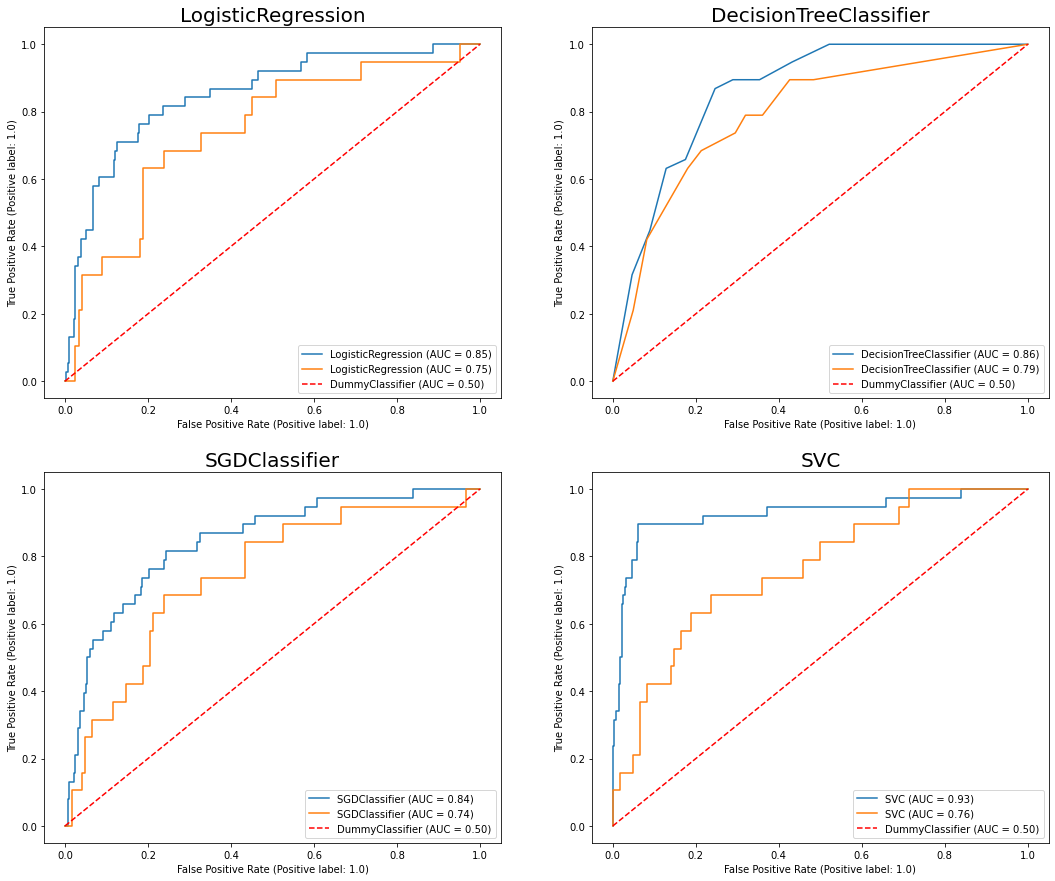

In [34]:
estimadores = [logistic_regression, decision_tree_classifier, sgd_classifier,svc]
comparacoes_roc(estimadores)

## Comentários sobre as pontuações dos estimadores

# Referências 


[COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)


https://www.stat.berkeley.edu/~aditya/resources/AllLectures2018Fall201A.pdf